<h2>Caveat</h2>
Web sites often change the format of their pages so this may not always work. If it doesn't, rework the examples after examining the html content of the page (most browsers will let you see the html source - look for a "page source" option - though you might have to turn on the developer mode in your browser preferences. For example, on Chrome you need to click the "developer mode" check box under Extensions in the Preferences/Options menu. 

<h1>Scraping web pages</h1>
<li>Most data that resides on the web is in HTML 
<li>HTML: HyperText Markup Language
<li>An html web page is a structured document
<li>We can exploit this structure to extract data from the page

<li>Learn html and css at <a href="https://www.khanacademy.org/computing/computer-programming/html-css">this site</a>

<b>Web scraping</b>: Automating the process of extracting information from web pages<br>
<li>for data collection and analysis
<li>for incorporating in a web app 

<h2>Python libraries for web scraping</h2>
<li><b>requests</b> for handling the request-response cycle
<li><b>beautifulsoup4</b> for extracting data from an html string
<li><b>selenium</b> for extracting data from an html string and managing the response process, particularly when a page contains JavaScript or when a button needs to be clicked

<h2>Beautiful Soup</h2>
<li>html and xml parser
<li>makes use of formatted html tags and css properties to extract data
<li>https://www.crummy.com/software/BeautifulSoup/bs4/doc/

<h2>Using BeautifulSoup to parse data</h2>

<h3>Import necessary modules</h3>

In [1]:
import requests
from bs4 import BeautifulSoup

<h3>Set up the BeautifulSoup object when the request is successful</h3>

In [5]:
url = "http://www.facebook.com/"
response = requests.get(url)
if response.status_code == 200:
    #print(response.content)
    page_data_soup = BeautifulSoup(response.content,'lxml')
    print(page_data_soup.prettify())
else:
    print("Error requesting this URL")

<!DOCTYPE html>
<html class="no_js" id="facebook" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="default" id="meta_referrer" name="referrer"/>
  <script>
   window._cstart=+new Date();
  </script>
  <script>
   function envFlush(a){function b(b){for(var c in a)b[c]=a[c]}window.requireLazy?window.requireLazy(["Env"],b):(window.Env=window.Env||{},b(window.Env))}envFlush({"ajaxpipe_token":"AXh5ijv7-jJvjRab","timeslice_heartbeat_config":{"pollIntervalMs":33,"idleGapThresholdMs":60,"ignoredTimesliceNames":{"requestAnimationFrame":true,"Event listenHandler mousemove":true,"Event listenHandler mouseover":true,"Event listenHandler mouseout":true,"Event listenHandler scroll":true},"isHeartbeatEnabled":true,"isArtilleryOn":false},"shouldLogCounters":true,"timeslice_categories":{"react_render":true,"reflow":true},"sample_continuation_stacktraces":true,"dom_mutation_flag":true,"stack_trace_limit":30,"timesliceBufferSize":5000,"show_invariant_decoder":false,"compat_iframe_token":"AQ7

In [6]:
keywords = input("Please enter the things you want to see in a recipe ")
url = "http://www.epicurious.com/search/" + keywords
response = requests.get(url)
if response.status_code == 200:
    #print(response.content)
    page_data_soup = BeautifulSoup(response.content,'lxml')
    print(page_data_soup.prettify())

Please enter the things you want to see in a recipe tofu
<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="app-id=312101965" name="apple-itunes-app"/>
  <title>
   Search | Epicurious.com
  </title>
  <link href="//assets.adobedtm.com" rel="dns-prefetch"/>
  <link href="https://www.google-analytics.com" rel="dns-prefetch"/>
  <link href="//tpc.googlesyndication.com" rel="dns-prefetch"/>
  <link href="//static.parsely.com" rel="dns-prefetch"/>
  <link href="//condenast.demdex.net" rel="dns-prefetch"/>
  <link href="//capture.condenastdigital.com" rel="dns-prefetch"/>
  <link href="//pixel.condenastdigital.com" rel="dns-prefetch"/>
  <link href="//use.typekit.net" rel="dns-prefetch"/>
  <link href="//fonts.typekit.net" rel="dns-prefetch"/>
  <link href="//p.typekit.net" rel="dns-prefetch"/>
  <link href="//assets.epicurious.com" rel="dns-prefetch"/>
  <link href="//ad.doubleclick.net" rel="dns-prefetch"/>
  <link href="//pagead2.googlesyndication.com" rel="dns-pre

<h3>BS4 functions</h3>

In [7]:
type(page_data_soup)
#dir(page_data_soup)  ## list all methods 
#page_data_soup.currentTag  ## in our case, the whole html document

bs4.BeautifulSoup

<h4>find_all finds all instances of a specified tag<br>
returns a result_set (a list)</h4>

In [9]:
all_a_tags = page_data_soup.find_all('a')
print(all_a_tags)

[<a data-reactid="5" href="/" itemprop="url" title="Epicurious">Epicurious</a>, <a data-reactid="72" href="/ingredients/best-tofu-brands-according-to-chefs-article">The Best Tofu Brands According to Chefs</a>, <a aria-label="The Best Tofu Brands According to Chefs" class="photo-link" data-reactid="74" href="/ingredients/best-tofu-brands-according-to-chefs-article"><div class="photo-wrap" data-reactid="75"><div class="component-lazy pending" data-component="Lazy" data-reactid="76"></div></div></a>, <a class="view-complete-item" data-reactid="77" href="/ingredients/best-tofu-brands-according-to-chefs-article" itemprop="url" title="The Best Tofu Brands According to Chefs"><!-- react-text: 78 -->View “<!-- /react-text --><!-- react-text: 79 -->The Best Tofu Brands According to Chefs<!-- /react-text --><!-- react-text: 80 -->”<!-- /react-text --></a>, <a data-reactid="85" href="/ingredients/terrific-tofu-recipes-gallery">37 Tasty Tofu Recipes for Soups, Dips, Salads, Desserts, and More</a>,

<h4>get_text() returns the marked up text (the content) enclosed in a tag.</h4>
<li>returns a string

In [7]:
for tag in all_a_tags:
    print(tag.get_text())
    if 'spicy' in tag.get_text():
        print(tag.parent)
        break  ## find spicy recipe

Epicurious
The Best Tofu Brands According to Chefs

View “The Best Tofu Brands According to Chefs”
37 Tasty Tofu Recipes for Soups, Dips, Salads, Desserts, and More

View “37 Tasty Tofu Recipes for Soups, Dips, Salads, Desserts, and More”
Silken Tofu Isn't Just a Protein—It's a Sauce

View “Silken Tofu Isn't Just a Protein—It's a Sauce”
Crispy Tofu Balls

View “Crispy Tofu Balls”
View Recipe
Quick view
Compare Recipe
In This House, We Stan House Foods Mapo Tofu

View “In This House, We Stan House Foods Mapo Tofu”
Coconut Cabbage and Tofu With Lemongrass and Ginger

View “Coconut Cabbage and Tofu With Lemongrass and Ginger”
View Recipe
Quick view
Compare Recipe
Weekly Meal Plan: April 15–19

View “Weekly Meal Plan: April 15–19”
Rice Noodles and Tofu in Peanut Sauce

View “Rice Noodles and Tofu in Peanut Sauce”
View Recipe
Quick view
Compare Recipe
Silken Tofu With Soy-Sauced Tomatoes

View “Silken Tofu With Soy-Sauced Tomatoes”
View Recipe
Quick view
Compare Recipe
Jerk Tofu Wrapped in 

In [58]:
for tag in page_data_soup.find_all('h4',itemprop='name'):
    print(tag.get_text())

The Best Tofu Brands According to Chefs
37 Tasty Tofu Recipes for Soups, Dips, Salads, Desserts, and More
Silken Tofu Isn't Just a Protein—It's a Sauce
Crispy Tofu Balls
In This House, We Stan House Foods Mapo Tofu
Coconut Cabbage and Tofu With Lemongrass and Ginger
Weekly Meal Plan: April 15–19
Rice Noodles and Tofu in Peanut Sauce
Silken Tofu With Soy-Sauced Tomatoes
Jerk Tofu Wrapped in Collard Leaves
Crispy Tofu With Maple-Soy Glaze
Chile and Ginger–Fried Tofu Salad With Kale
Tofu and Summer Vegetable Curry
Kimchi Soup With Tofu and Clams
Oven-Roasted Tofu Is the Vegetarian Main We've Been Waiting For
Cold Soba Noodles with Miso and Tofu
Shawarma-Spiced Tofu Pita Wraps
Creamy Ginger Dressing


<h4>find finds the first instance of a specified tag<br>
returns a bs4 element</h4>

In [10]:
header = page_data_soup.find('h4')
header

<h4 class="hed" data-reactid="71" data-truncate="3" itemprop="name"><a data-reactid="72" href="/ingredients/best-tofu-brands-according-to-chefs-article">The Best Tofu Brands According to Chefs</a></h4>

In [11]:
header.find('a')

<a data-reactid="72" href="/ingredients/best-tofu-brands-according-to-chefs-article">The Best Tofu Brands According to Chefs</a>

<h4>Using selector=value</h4>

In [13]:
articles = page_data_soup.find_all('article',class_="recipe-content-card")

In [14]:
articles

[<article class="recipe-content-card" data-has-quickview="false" data-index="3" data-reactid="107" itemscope="" itemtype="https://schema.org/Recipe"><header class="summary" data-reactid="108"><strong class="tag" data-reactid="109">recipe</strong><h4 class="hed" data-reactid="110" data-truncate="3" itemprop="name"><a data-reactid="111" href="/recipes/food/views/crispy-tofu-balls">Crispy Tofu Balls</a></h4><p class="dek" data-reactid="112" data-truncate="1">This recipe is a game-changer for people who think they don't like tofu. To get the right balance between moisture and texture, we provide three techniques for removing excess liquid.</p><dl class="recipes-ratings-summary" data-reactid="113" data-reviews-count="0" data-reviews-rating="0" itemprop="aggregateRating" itemscope="" itemtype="https://schema.org/AggregateRating"><dt class="rating-label" data-reactid="114">Average user rating</dt><span class="reviews-count-container" data-reactid="115"><dd class="rating" data-rating="unrated"

In [15]:
# Will this work?
articles.find('a')  ##it is a list instead of object, we cannot find it within a list

AttributeError: ResultSet object has no attribute 'find'. You're probably treating a list of items like a single item. Did you call find_all() when you meant to call find()?

In [16]:
recipe_list = list()
for tag in page_data_soup.find_all('h4',itemprop='name'):
    one_recipe_tag = tag.find('a')
    link = 'http://www.epicurious.com' + one_recipe_tag.get('href')
    if not '/recipes/' in link:
        continue
    recipe_name = one_recipe_tag.get_text()
    recipe_list.append((recipe_name,link))

In [17]:
recipe_list

[('Crispy Tofu Balls',
  'http://www.epicurious.com/recipes/food/views/crispy-tofu-balls'),
 ('Coconut Cabbage and Tofu With Lemongrass and Ginger',
  'http://www.epicurious.com/recipes/food/views/coconut-cabbage-and-tofu-with-lemongrass-and-ginger'),
 ('Rice Noodles and Tofu in Peanut Sauce',
  'http://www.epicurious.com/recipes/food/views/rice-noodles-and-tofu-in-peanut-sauce'),
 ('Silken Tofu With Soy-Sauced Tomatoes',
  'http://www.epicurious.com/recipes/food/views/silken-tofu-with-soy-sauced-tomatoes'),
 ('Jerk Tofu Wrapped in Collard Leaves',
  'http://www.epicurious.com/recipes/food/views/jerk-tofu-wrapped-in-collard-leaves-bryant-terry-vegetable-kingdom'),
 ('Crispy Tofu With Maple-Soy Glaze',
  'http://www.epicurious.com/recipes/food/views/crispy-tofu-with-maple-soy-glaze'),
 ('Chile and Ginger–Fried Tofu Salad With Kale',
  'http://www.epicurious.com/recipes/food/views/chile-and-ginger-fried-tofu-salad-with-kale-melissa-clark-dinner'),
 ('Tofu and Summer Vegetable Curry',
  '

<h2>Summary of bs4 functions</h2>

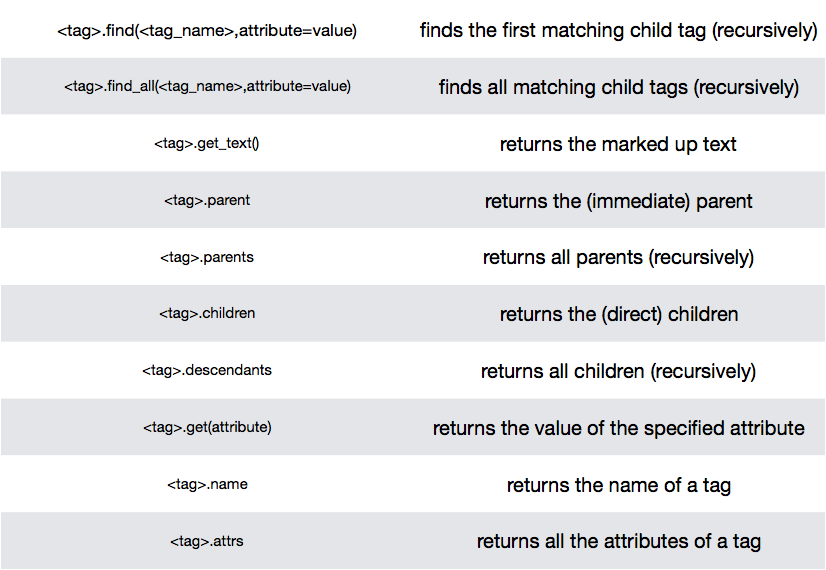

In [18]:
# Class Practice #1
# Write a function epicurious_recipes(search_string) that 
# returns the list of recipes associated with search_string

# http://www.epicurious.com/search/Tofu%20Chili
def epicurious_recipe(search_string):
    from bs4 import BeautifulSoup
    import requests
    url = "http://www.epicurious.com/search/"
    # The join() method takes all items in an iterable and joins them into one string.
    # The split() method splits a string into a list.
    url+='+'.join(search_string.split())   
    recipe_url_list=list()
    response=requests.get(url)
    if response.status_code==200:
        page_soup=BeautifulSoup(response.content,"lxml")
        for tag in page_soup.find_all('h4',itemprop='name'):
            link = tag.find('a').get('href')
            if not 'recipes' in link:
                 continue
            link = 'http://www.epicurious.com' + link
            recipe_name = tag.find('a').get_text()
            recipe_url_list.append((recipe_name,link))
    return recipe_url_list

In [19]:
recipes = epicurious_recipe("Beef Chili")
recipes

[('Our 33 Best Chili Recipes',
  'http://www.epicurious.com/recipes-menus/best-chili-recipes-gallery'),
 ('41 Great Recipes for Ground Chicken and Ground Turkey',
  'http://www.epicurious.com/ingredients/our-best-ground-chicken-and-turkey-recipes-gallery'),
 ('Big-Batch Seasoned Ground Beef',
  'http://www.epicurious.com/recipes/food/views/big-batch-seasoned-ground-beef'),
 ('Instant Pot Beef and Sweet Potato Chili',
  'http://www.epicurious.com/recipes/food/views/instant-pot-beef-and-sweet-potato-chili'),
 ('What to Cook This Weekend: February 1–3',
  'http://www.epicurious.com/recipes-menus/what-to-cook-this-weekend-february-1-3-gallery'),
 ('Weekly Meal Plan: May 27-31',
  'http://www.epicurious.com/recipes-menus/weekly-meal-plan-pork-burgers-roasted-salmon-grilled-cheese-article'),
 ('Weekly Meal Plan: June 24–28',
  'http://www.epicurious.com/recipes-menus/weekly-meal-plan-pulled-chicken-sandwiches-spiced-meatballs-and-extra-easy-fried-rice-article')]

In [38]:
# Class Practice #2
# Call the function with a search_string, open the link
# associated with the first recipe, then return the
# ingredients and preparation instructions associated with that link
import requests
from bs4 import BeautifulSoup
recipe_list=epicurious_recipe("Tofu Chili")
first_recipe=recipe_list[0]
fist_recipe_link=first_recipe[1]
first_response=requests.get(fist_recipe_link)
recipe_soup=BeautifulSoup(first_response.content,"lxml")
ingredients=recipe_soup.find_all('li',itemprop='ingredients')
preparation=recipe_soup.find_all('li',itemprop='preparation_step')
#print("Ingredients:")
for ingredient in recipe_soup.find_all('li',itemprop='ingredients'):
    print(ingredient.get_text())
#print("Preparation:")
#for prep_step in preparation:
#    print(prep_step.get_text())


<h1>Logging in to a web server</h1>

<li>Figure out the login url 
<li>https://en.wikipedia.org/w/index.php?title=Special:UserLogin&returnto=Main+Page
<li>Look for the login form in the html source
<li>form_tag = page_soup.find('form')
<li>Look for ALL the inputs in the login form (some may be tricky!)
<li>input_tags = form_tag.find_all('input')
<li>Create a Python dict object with key,value pairs for each input
<li>Use requests.session to create an open session object
<li>Send the login request (POST)
<li>Send followup requests keeping the sessions object open

In [31]:
#Why do we need to log in?
url = "https://en.wikipedia.org/wiki/Special:Watchlist"
response = requests.get(url)
response
response.url

'https://en.wikipedia.org/w/index.php?title=Special:UserLogin&returnto=Special%3AWatchlist&returntoquery=&warning=watchlistanontext'

<h2>Get username and password</h2>
<li>Best to store in a file for reuse
<li>You will need to set up your own login and password and place them in a file called wikidata.txt
<li>Line one of the file should contain your username
<li>Line two your password

In [45]:
with open('/Users/ya/2020 - Spring/Keys/wiki.txt') as f:
    contents = f.read().split('\n')
    username = contents[0]
    password = contents[1]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ya/2020 - Spring/Keys/wiki.txt'

In [46]:
url = "https://en.wikipedia.org/w/index.php?title=Special:UserLogin&returnto=Special%3AWatchlist"
response = requests.get(url)
url_soup = BeautifulSoup(response.content,'lxml')
url_soup.find('form') #.find_all('input')

<form action="/w/index.php?title=Special:UserLogin&amp;returnto=Special:Watchlist" class="mw-htmlform mw-ui-vform mw-ui-container" method="post" name="userlogin"><div>
<div class="mw-htmlform-field-HTMLTextField loginText mw-ui-vform-field"><label for="wpName1">Username</label><div class="mw-input"><input autofocus="" class="loginText mw-ui-input" id="wpName1" name="wpName" placeholder="Enter your username" required="" size="20" tabindex="1"/>
</div></div><div class="mw-htmlform-field-HTMLTextField loginPassword mw-ui-vform-field"><label for="wpPassword1">Password</label><div class="mw-input"><input class="loginPassword mw-ui-input" id="wpPassword1" name="wpPassword" placeholder="Enter your password" required="" size="20" tabindex="2" type="password"/>
</div></div><div class="mw-htmlform-field-HTMLCheckField mw-ui-vform-field"><div class="mw-input mw-htmlform-nolabel"><div class="mw-ui-checkbox"><input id="wpRemember" name="wpRemember" tabindex="3" type="checkbox" value="1"/> <label fo

In [53]:
payload = {
    'wpName': username,
    'wpPassword': password,
    'wpRemember': '1',
    'wpEditToken': "+\\",
    'title': "Special:UserLogin",
    'authAction': "login",
    'force': "",
    #'wpLoginToken': ‘', #We need to read this from the page
    'wpForceHttps': "1",
    'wpFromhttp': "1"
    }

NameError: name 'username' is not defined

In [54]:
payload

NameError: name 'payload' is not defined

In [55]:
token = url_soup.find('input',{'name':"wpLoginToken"}).get('value')

In [56]:
token

'7b8a2bbec15e92340d5bff22a13143475e435ad3+\\'

In [57]:
payload['wpLoginToken'] = token

NameError: name 'payload' is not defined

In [52]:
payload

NameError: name 'payload' is not defined

<h3>Setup a session, login, and get data</h3>

In [ ]:
def get_login_token(response):
    soup = BeautifulSoup(response.text, 'lxml')
    token = soup.find('input',{'name':"wpLoginToken"}).get('value')
    return token

payload = {
    'wpName': username,
    'wpPassword': password,
    'wpRemember': '1',
    'wpEditToken': "+\\",
    'title': "Special:UserLogin",
    'authAction': "login",
    'force': "",
    #'wpLoginToken': ‘', #We need to read this from the page
    'wpForceHttps': "1",
    'wpFromhttp': "1"
    }

with requests.session() as s:
    response = s.get('https://en.wikipedia.org/w/index.php?title=Special:UserLogin&returnto=Main+Page')
    payload['wpLoginToken'] = get_login_token(response)

    #Send the login request
    response_post = s.post('https://en.wikipedia.org/w/index.php?title=Special:UserLogin&action=submitlogin&type=login',
                           data=payload)
    response = s.get('https://en.wikipedia.org/wiki/Special:Watchlist')
    data = BeautifulSoup(response.content,'lxml')
    print(data.find('div',class_='watchlistDetails').get_text())

In [ ]:
#response.url
response.content

<h3>What to do with blocked sites</h3>

In [ ]:
#import requests

response = requests.get('http://worldagnetwork.com')
response

In [ ]:
#!pip install selenium
!conda install selenium

# https://github.com/mozilla/geckodriver/releases
# https://ftp.mozilla.org/pub/firefox/releases/.......
# https://sites.google.com/a/chromium.org/chromedriver/downloads
# http://phantomjs.org/download.html

In [ ]:
from selenium import webdriver

url = 'http://worldagnetwork.com'
browser = webdriver.Firefox()

#import os
#chromedriver = "/Path to WebDrivers/chromedriver"
#os.environ["webdriver.chrome.driver"] = chromedriver
#browser = webdriver.Chrome(chromedriver)

browser.get(url)
links=browser.find_elements_by_tag_name("a") 
print(links)


In [ ]:
links[0].get_attribute("href")

In [ ]:
browser.quit()

In [ ]:
import os
import time
from selenium import webdriver

url = 'https://www.nyc.com/restaurants/'

browser = webdriver.PhantomJS()
browser.get(url)

browser.execute_script("window.scrollTo(0,100000)")

time.sleep(30)

links=browser.find_elements_by_tag_name("a") 
print(len(links))
 
browser.quit()

In [ ]:
## Class Practice 3
## url = http://www.xe.com/currencytables/?from=EUR&date=2018-01-29 
## Use selenium to extract the rates table from the above page
## You can use find_elements_by_class_name 